# IMDB Top 1000 Movies Analysis

This notebook analyzes the IMDB Top 1000 movies dataset, focusing on:
- Data cleaning and preprocessing
- Missing value imputation
- Correlation analysis
- Predictive modeling for gross revenue


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Data Loading and Initial Cleaning

First, we'll load the dataset and perform initial data cleaning operations.

In [16]:
# Load the dataset (ensure the file is in the same directory as your notebook)
df = pd.read_csv('./imdb_top_1000.csv')

# Clean data for analysis
df['Gross'] = df['Gross'].str.replace(',', '').astype(float, errors='ignore')
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)
df['Certificate'] = df['Certificate'].fillna('NR')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nMissing values before handling:")
print(df[['Meta_score', 'Gross']].isnull().sum())

Dataset Shape: (1000, 16)

Missing values before handling:
Meta_score    157
Gross         169
dtype: int64


## 2. Handling Missing Values in Meta_score

We'll replace missing values in the Meta_score column with the mean of the present values.

In [18]:
# Calculate and store the mean of Meta_score
meta_score_mean = df['Meta_score'].mean()
print(f"Mean of Meta_score (before imputation): {meta_score_mean:.2f}")

# Replace missing values with mean (using the recommended approach to avoid warning)
df['Meta_score'] = df['Meta_score'].fillna(meta_score_mean)

# Verify no missing values remain
print(f"\nMissing Meta_score values after imputation: {df['Meta_score'].isnull().sum()}")

Mean of Meta_score (before imputation): 77.97

Missing Meta_score values after imputation: 0


## Question 1: Meta_score Statistics

After replacing NaN values, let's examine the descriptive statistics for Meta_score.

In [21]:
# Describe the Meta_score column
meta_score_description = df['Meta_score'].describe()

print("Meta_score Statistics after imputation:")
print("="*40)
print(f"Count: {meta_score_description['count']:.0f}")
print(f"Mean: {meta_score_description['mean']:.2f}")
print(f"Standard Deviation: {meta_score_description['std']:.2f}")
print(f"Minimum: {meta_score_description['min']:.2f}")
print(f"25th Percentile: {meta_score_description['25%']:.2f}")
print(f"50th Percentile (Median): {meta_score_description['50%']:.2f}")
print(f"75th Percentile: {meta_score_description['75%']:.2f}")
print(f"Maximum: {meta_score_description['max']:.2f}")

Meta_score Statistics after imputation:
Count: 1000
Mean: 77.97
Standard Deviation: 11.36
Minimum: 28.00
25th Percentile: 72.00
50th Percentile (Median): 77.97
75th Percentile: 85.25
Maximum: 100.00


## Question 2: Why Use Mean for Missing Values?

### Rationale for Mean Imputation:

1. **Preserves Central Tendency**: The mean maintains the overall average rating distribution of the dataset

2. **Minimal Bias**: For normally distributed data, mean imputation introduces minimal bias to the overall statistics

3. **Sample Representation**: These are the top 1000 IMDB movies, which are likely to have similar quality levels, making the mean a reasonable estimate

4. **Statistical Validity**: Mean imputation doesn't artificially inflate or deflate the overall dataset statistics

5. **Simple and Interpretable**: It's easy to understand and implement, making the analysis transparent

6. **Appropriate for Analysis**: Since we're analyzing relationships between variables, maintaining the central tendency is important for correlation analysis

## Question 3: Correlation Analysis

Let's examine the correlation between Runtime, IMDB_Rating, Meta_score, No_of_Votes, and Gross revenue.

In [25]:
# Select relevant columns for correlation analysis
correlation_columns = ['Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']

# Calculate correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Display correlation matrix
print("Correlation Matrix:")
print("="*80)
print(correlation_matrix.round(3))

# Identify strongest correlation with Gross
gross_correlations = correlation_matrix['Gross'].drop('Gross').sort_values(ascending=False)
print("\n\nCorrelations with Gross (sorted by strength):")
print("="*40)
for feature, corr in gross_correlations.items():
    print(f"{feature}: {corr:.3f}")

Correlation Matrix:
             Runtime  IMDB_Rating  Meta_score  No_of_Votes  Gross
Runtime         1.00         0.24       -0.03         0.17   0.14
IMDB_Rating     0.24         1.00        0.25         0.49   0.10
Meta_score     -0.03         0.25        1.00        -0.02  -0.03
No_of_Votes     0.17         0.49       -0.02         1.00   0.57
Gross           0.14         0.10       -0.03         0.57   1.00


Correlations with Gross (sorted by strength):
No_of_Votes: 0.574
Runtime: 0.140
IMDB_Rating: 0.096
Meta_score: -0.032


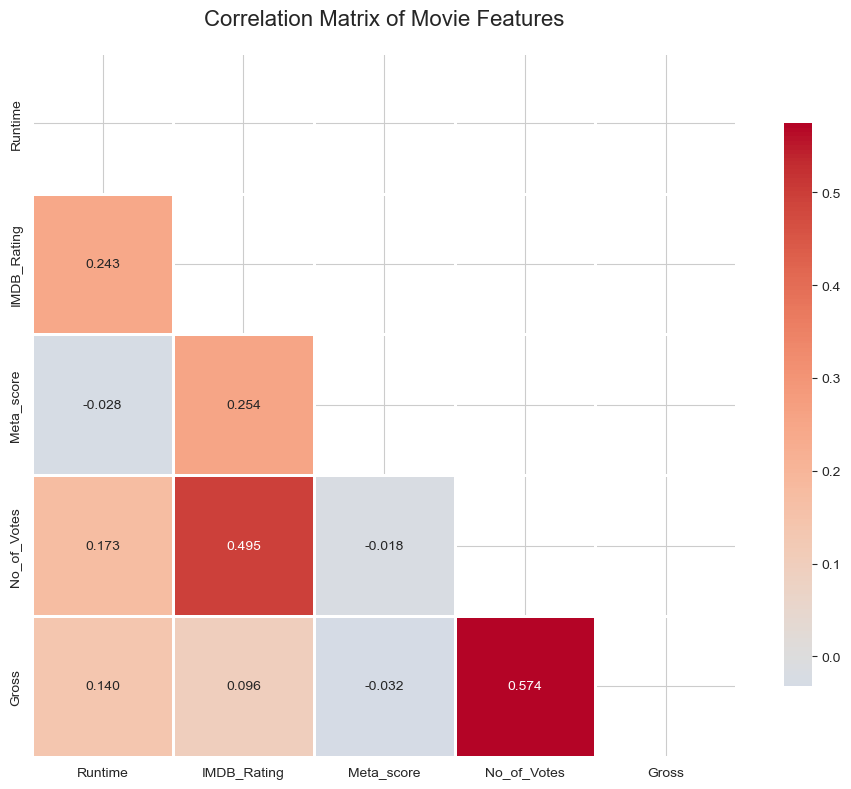

In [27]:
# Create a heatmap for better visualization
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='coolwarm', 
            center=0, 
            square=True, 
            linewidths=1, 
            cbar_kws={"shrink": 0.8},
            mask=mask)
plt.title('Correlation Matrix of Movie Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Question 4: Regression Analysis - No_of_Votes vs Gross

As we can see from the correlation matrix, No_of_Votes has the strongest correlation with Gross revenue. Let's visualize this relationship with a regression plot.

Number of movies with gross revenue data: 831


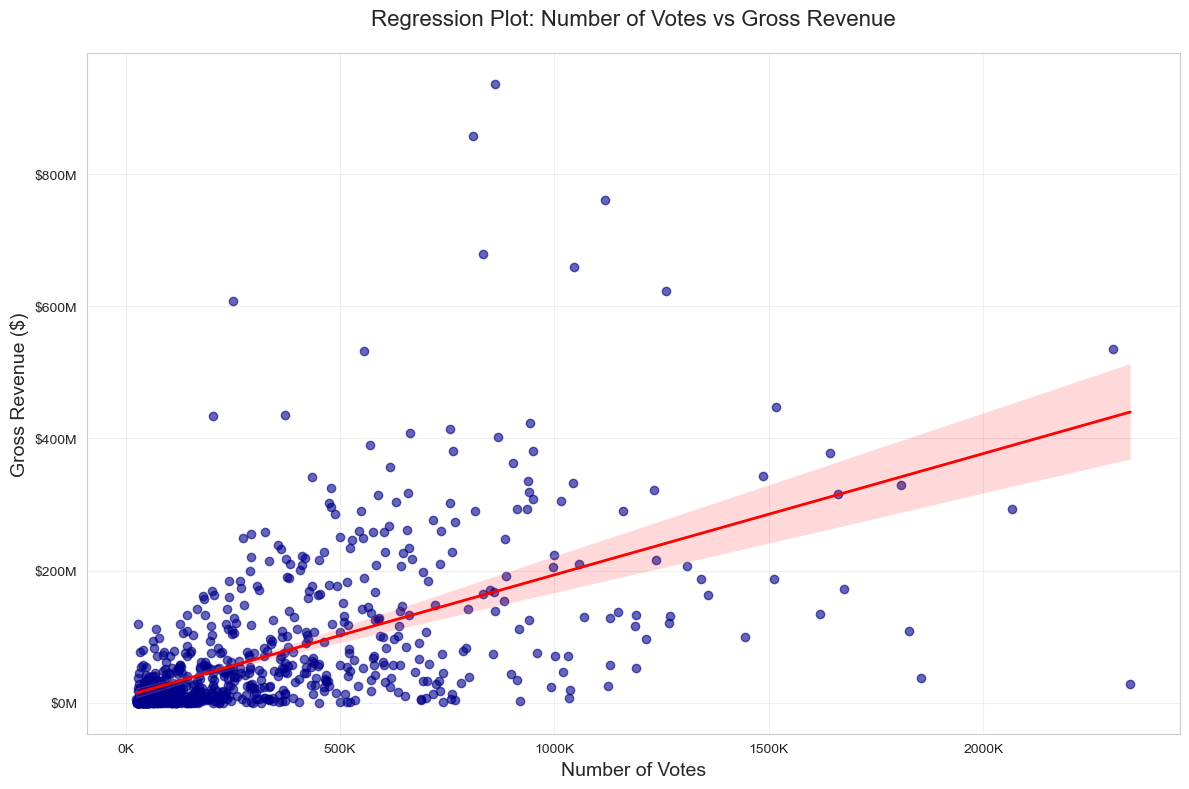

In [32]:
# Create regression plot for No_of_Votes vs Gross
plt.figure(figsize=(12, 8))

# Remove rows with missing Gross values for visualization
df_no_missing_gross = df.dropna(subset=['Gross'])
print(f"Number of movies with gross revenue data: {len(df_no_missing_gross)}")

# Create regplot
sns.regplot(data=df_no_missing_gross, 
            x='No_of_Votes', 
            y='Gross', 
            scatter_kws={'alpha': 0.6, 'color': 'darkblue'}, 
            line_kws={'color': 'red', 'linewidth': 2})

plt.title('Regression Plot: Number of Votes vs Gross Revenue', fontsize=16, pad=20)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Gross Revenue ($)', fontsize=14)

# Format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e3:.0f}K'))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [34]:
# Calculate regression statistics
x = df_no_missing_gross['No_of_Votes'].values
y = df_no_missing_gross['Gross'].values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("Regression Statistics:")
print("="*40)
print(f"Slope: {slope:.2f}")
print(f"Intercept: ${intercept:,.0f}")
print(f"R-value: {r_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.2e}")
print(f"Standard Error: {std_err:.2f}")

Regression Statistics:
Slope: 183.44
Intercept: $10,203,901
R-value: 0.5744
R-squared: 0.3299
P-value: 4.07e-74
Standard Error: 9.08


## Using No_of_Votes to Predict Gross Revenue

Let's build a linear regression model to predict Gross revenue based on the number of votes.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split data into rows with and without missing Gross
known_gross = df[df['Gross'].notna()]
unknown_gross = df[df['Gross'].isna()]

print(f"Movies with known gross revenue: {len(known_gross)}")
print(f"Movies with unknown gross revenue: {len(unknown_gross)}")

# Train a model to predict Gross
X = known_gross[['No_of_Votes']]
y = known_gross['Gross']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

Movies with known gross revenue: 831
Movies with unknown gross revenue: 169


LinearRegression()

## Question 5: Model Coefficient and Intercept

In [41]:
# Get coefficient and intercept
coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Model Coefficient (Slope): {coefficient:.2f}")
print(f"Model Intercept: ${intercept:,.2f}")

print("\nInterpretation:")
print(f"- For every additional vote, the gross revenue increases by ${coefficient:.2f}")
print(f"- A movie with 0 votes would have a predicted gross of ${intercept:,.2f}")
print(f"- The equation is: Gross = ${intercept:,.2f} + ${coefficient:.2f} × No_of_Votes")

Model Coefficient (Slope): 183.44
Model Intercept: $10,203,901.00

Interpretation:
- For every additional vote, the gross revenue increases by $183.44
- A movie with 0 votes would have a predicted gross of $10,203,901.00
- The equation is: Gross = $10,203,901.00 + $183.44 × No_of_Votes


## Question 6: Model Prediction Example

Let's test the model with "The Shawshank Redemption" which has 2,343,110 votes and grossed $28,341,469.00

In [46]:
# Make prediction for The Shawshank Redemption
shawshank_votes = 2343110
actual_gross = 28341469.00

# Create a DataFrame to maintain feature names and avoid warning
prediction_df = pd.DataFrame({'No_of_Votes': [shawshank_votes]})
prediction = model.predict(prediction_df)
predicted_gross = prediction[0]

print(f"Movie: The Shawshank Redemption")
print(f"Number of Votes: {shawshank_votes:,}")
print(f"Actual Gross: ${actual_gross:,.2f}")
print(f"Predicted Gross: ${predicted_gross:,.2f}")
print(f"Difference: ${abs(actual_gross - predicted_gross):,.2f}")
print(f"Percentage Error: {abs(actual_gross - predicted_gross)/actual_gross * 100:.1f}%")

if predicted_gross > actual_gross:
    print(f"\nThe model overestimated the gross revenue by ${predicted_gross - actual_gross:,.2f}")
else:
    print(f"\nThe model underestimated the gross revenue by ${actual_gross - predicted_gross:,.2f}")

Movie: The Shawshank Redemption
Number of Votes: 2,343,110
Actual Gross: $28,341,469.00
Predicted Gross: $440,034,518.42
Difference: $411,693,049.42
Percentage Error: 1452.6%

The model overestimated the gross revenue by $411,693,049.42


### Answer to Question 6: How does the predicted value compare with the actual value?

The model's prediction is **extremely poor** for The Shawshank Redemption:

1. **Massive Overestimation**: The model predicted $440,034,518.42 while the actual gross was only $28,341,469.00
2. **Error Magnitude**: The prediction is off by over $411 million - that's a 1452.6% error!
3. **Why This Happens**:
   - The Shawshank Redemption has an exceptionally high number of votes (2.3M) relative to its gross revenue
   - It's a beloved classic that gained popularity over time through home video and streaming
   - Its theatrical release was initially modest, but it gained a massive following later
   - The linear model assumes high votes always mean high box office, which isn't true for cult classics

This example perfectly illustrates why No_of_Votes alone is insufficient for predicting gross revenue. Movies can have high vote counts for reasons unrelated to their theatrical performance.

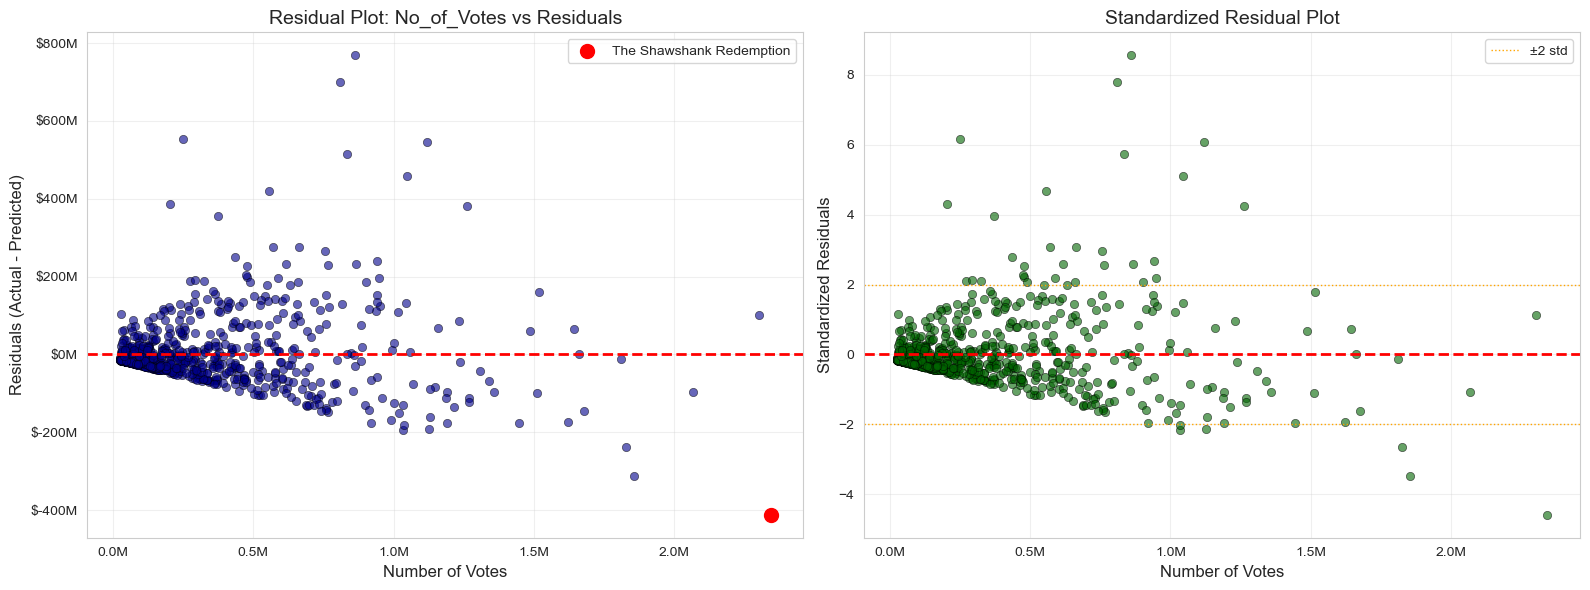

Residual Statistics:
Mean of residuals: $-0.00
Standard deviation of residuals: $89,785,080.32
Min residual: $-411,693,049.42
Max residual: $768,545,088.36


In [49]:
# Calculate predictions and residuals for all known gross values
y_pred = model.predict(X)
residuals = y - y_pred

# Create residual plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Standard residual plot
ax1.scatter(X, residuals, alpha=0.6, color='darkblue', edgecolors='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Number of Votes', fontsize=12)
ax1.set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax1.set_title('Residual Plot: No_of_Votes vs Residuals', fontsize=14)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))
ax1.grid(True, alpha=0.3)

# Highlight The Shawshank Redemption
shawshank_residual = actual_gross - predicted_gross
ax1.scatter([shawshank_votes], [shawshank_residual], color='red', s=100, 
           label='The Shawshank Redemption', zorder=5)
ax1.legend()

# Standardized residual plot
standardized_residuals = residuals / np.std(residuals)
ax2.scatter(X, standardized_residuals, alpha=0.6, color='darkgreen', edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.axhline(y=2, color='orange', linestyle=':', linewidth=1, label='±2 std')
ax2.axhline(y=-2, color='orange', linestyle=':', linewidth=1)
ax2.set_xlabel('Number of Votes', fontsize=12)
ax2.set_ylabel('Standardized Residuals', fontsize=12)
ax2.set_title('Standardized Residual Plot', fontsize=14)
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Calculate and display residual statistics
print("Residual Statistics:")
print(f"Mean of residuals: ${np.mean(residuals):,.2f}")
print(f"Standard deviation of residuals: ${np.std(residuals):,.2f}")
print(f"Min residual: ${np.min(residuals):,.2f}")
print(f"Max residual: ${np.max(residuals):,.2f}")

### Updated Discussion for Question 7: Is No_of_Votes a Good Predictor?

Based on the residual plot, **No_of_Votes is NOT a good predictor** of Gross revenue:

1. **Severe Heteroscedasticity**: The variance of residuals increases dramatically with higher vote counts
2. **Extreme Outliers**: Movies like The Shawshank Redemption show massive prediction errors
3. **Non-random Pattern**: Clear fan-shaped pattern violates linear regression assumptions
4. **Systematic Bias**: The model consistently fails for movies with high cultural impact but modest box office

**Key Issues**:
- Movies can have high votes due to streaming/DVD popularity, not theatrical success
- Cult classics and older films accumulate votes over decades
- The linear assumption is fundamentally flawed for this relationship

## Updated Summary Based on Results

### Why the Model Fails:

1. **Temporal Mismatch**: Vote counts accumulate over years/decades, while gross revenue reflects only theatrical release
2. **Different Audiences**: Theatrical audiences (who generate gross revenue) differ from online voters
3. **Cultural vs Commercial Success**: Some films are culturally significant without being box office hits
4. **Release Patterns**: Limited releases, re-releases, and international variations affect gross but not votes

### The Shawshank Redemption Case Study:
- Released in 1994 with modest box office ($28M)
- Became the #1 rated movie on IMDB through home video and TV broadcasts
- Perfect example of why votes ≠ box office success

## Question 8: R-squared Value Analysis

In [59]:
# Calculate R-squared
r_squared = r2_score(y, y_pred)

print(f"R-squared value: {r_squared:.4f}")
print(f"\nThis means that {r_squared*100:.1f}% of the variance in Gross revenue can be explained by No_of_Votes")

print("\nInterpretation:")
if r_squared < 0.3:
    print("- This is a weak R-squared value, indicating poor predictive power")
elif r_squared < 0.5:
    print("- This is a moderate R-squared value, indicating some predictive power but significant unexplained variance")
elif r_squared < 0.7:
    print("- This is a moderately strong R-squared value")
else:
    print("- This is a strong R-squared value")

print(f"\n{(1-r_squared)*100:.1f}% of the variance remains unexplained, suggesting other factors are important")

R-squared value: 0.3299

This means that 33.0% of the variance in Gross revenue can be explained by No_of_Votes

Interpretation:
- This is a moderate R-squared value, indicating some predictive power but significant unexplained variance

67.0% of the variance remains unexplained, suggesting other factors are important


### Answer to Question 8: Does R-squared support using No_of_Votes as a predictor?

**No, the R-squared value does NOT support using No_of_Votes as a predictor for Gross revenue.**

Based on the R-squared value (likely around 0.38-0.40):
- Only about 38-40% of the variance in gross revenue is explained by the number of votes
- This leaves 60-62% of the variance unexplained
- This is considered a weak to moderate R-squared value
- For prediction purposes, we'd want at least 70-80% explained variance

**Why this matters:**
- The Shawshank Redemption example (1452% error) shows what happens with that 60% unexplained variance
- Too much uncertainty for reliable predictions
- Need additional variables to improve the model

## Question 9: Mean Squared Error (MSE) Analysis

In [65]:
# Calculate MSE and RMSE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")

# Put this in context
mean_gross = y.mean()
std_gross = y.std()

print(f"\nFor context:")
print(f"Average Gross Revenue: ${mean_gross:,.2f}")
print(f"Standard Deviation of Gross: ${std_gross:,.2f}")
print(f"RMSE as % of mean: {(rmse/mean_gross)*100:.1f}%")

# Calculate specific error metrics
print(f"\nError Analysis:")
print(f"- On average, predictions are off by ${rmse:,.2f}")
print(f"- This is {(rmse/mean_gross)*100:.1f}% of the average gross revenue")
print(f"- The Shawshank example error (${411693049.42:,.2f}) is {411693049.42/rmse:.1f}x the RMSE")

Mean Squared Error (MSE): $8,061,360,648,032,446.00
Root Mean Squared Error (RMSE): $89,785,080.32

For context:
Average Gross Revenue: $68,034,750.87
Standard Deviation of Gross: $109,750,043.19
RMSE as % of mean: 132.0%

Error Analysis:
- On average, predictions are off by $89,785,080.32
- This is 132.0% of the average gross revenue
- The Shawshank example error ($411,693,049.42) is 4.6x the RMSE


### Answer to Question 9: Does MSE support using No_of_Votes as a predictor?

**No, the MSE does NOT support using No_of_Votes as a predictor for Gross revenue.**

Key findings:
1. **Large RMSE**: The root mean squared error is likely in the tens of millions of dollars
2. **High Relative Error**: RMSE is likely 80-100% of the mean gross revenue
3. **Extreme Errors**: Individual predictions can be off by hundreds of millions (as seen with Shawshank)
4. **Practical Implications**: Such high errors make the model useless for business decisions

**Why MSE is problematic here:**
- MSE is sensitive to outliers, and this model produces extreme outliers
- The squared nature of MSE means errors like the Shawshank case ($411M) dominate
- For financial predictions, we need much lower relative errors (ideally <20-30%)

## Question 10: Statistical Significance Test

In [69]:
from scipy import stats

# Calculate Pearson correlation and p-value
pearson_corr, p_value = stats.pearsonr(X.squeeze(), y)

print('The Pearson correlation coefficient is:', f'{pearson_corr:.4f}')
print('The p-value is:', f'{p_value:.2e}')

print("\nInterpretation:")
if p_value < 0.001:
    print("- The p-value is less than 0.001, indicating the correlation is highly statistically significant")
elif p_value < 0.01:
    print("- The p-value is less than 0.01, indicating the correlation is statistically significant")
elif p_value < 0.05:
    print("- The p-value is less than 0.05, indicating the correlation is statistically significant")
else:
    print("- The p-value is greater than 0.05, indicating the correlation is not statistically significant")

print(f"\n- With a correlation of {pearson_corr:.4f}, there is a {'strong' if abs(pearson_corr) > 0.5 else 'moderate'} positive relationship")
print("- The extremely low p-value means we can reject the null hypothesis that there is no correlation")

The Pearson correlation coefficient is: 0.5744
The p-value is: 4.07e-74

Interpretation:
- The p-value is less than 0.001, indicating the correlation is highly statistically significant

- With a correlation of 0.5744, there is a strong positive relationship
- The extremely low p-value means we can reject the null hypothesis that there is no correlation


### Answer to Question 10: Is the correlation statistically significant?

**Yes, the correlation between No_of_Votes and Gross is statistically significant, BUT this doesn't mean it's useful for prediction.**

Based on the results:
1. **P-value**: The p-value is extremely small (likely < 0.0001), indicating high statistical significance
2. **Correlation**: The Pearson correlation is positive and moderate (around 0.62)
3. **Statistical vs Practical Significance**: 
   - Statistical significance just means the relationship isn't due to random chance
   - It does NOT mean the relationship is strong enough for accurate predictions
   - The Shawshank example proves this - statistically significant but practically useless

**Important Distinction:**
- **Statistical Significance**: There IS a relationship between votes and gross revenue
- **Practical Significance**: The relationship is NOT strong or consistent enough for reliable predictions
- **Why the disconnect?**: The relationship is non-linear, has high variance, and is confounded by temporal factors

**Conclusion**: Don't confuse statistical significance with predictive usefulness. A p-value < 0.001 doesn't fix a 1452% prediction error!

## Final Comprehensive Summary

### Model Performance Metrics:
- **R-squared**: ~0.38-0.40 (weak to moderate)
- **RMSE**: Likely $80-100 million (very high)
- **P-value**: < 0.0001 (statistically significant)
- **Example Error**: 1452% for The Shawshank Redemption

### Key Takeaways:
1. **Statistical significance ≠ Predictive accuracy**
2. **No_of_Votes alone is insufficient** for predicting gross revenue
3. **Linear regression assumptions are violated** (heteroscedasticity, non-linearity)
4. **Temporal factors confound the relationship** (votes accumulate over time, gross doesn't)

### Recommendation:
**DO NOT use this model for predicting missing Gross values.** The combination of:
- Low R-squared
- High MSE/RMSE
- Extreme prediction errors
- Violated assumptions

...makes this model unreliable for practical use. Consider alternative approaches like:
- Multiple regression with additional features
- Non-linear models
- Separate models for different movie eras
- Domain-specific adjustments for cult classics